In [130]:
import numpy as np
import pandas as pd

## blobs status

In [131]:
TaxaDeFilhos=1
TaxaDeMatricula=1

## entravista no trabalho
TaxaDeNãoAceitacaoPublico=0.9
TaxaDeNãoAceitacaoPrivado=0.1
##Trabalho "ruim"
SalarioMinimo = 750
SalarioMaximo = 900

##trabalho "bom"
Estagiario = 1000
TetoSalarial =  3000

##Nummero da poulação
PorpopulBranca = 0.3
PorpopulPreta  = 1-PorpopulBranca
##Numero em escolas boas
PorPretaShocl  = 0.0
PorBrancShocl  = 0.0
##Numero em salarios bons
PorPretaWork   = 0.0
PorBrancWork   = 0.0
##Salario Inicial
PretaSalIn  = 500
BrancaSalIn = 1000

TotalDaPopulacao = 10000


In [132]:
class Buble:
    def __init__(self,Color,Scholatry,work,money,ger):
        self.col=Color
        self.sho=Scholatry
        self.wor=work
        self.money = money
        self.ger = ger
    def Generation(self,ger):
            if self.money>TaxaDeFilhos*1000:
                self.money-=TaxaDeFilhos*1000
                if self.money>TaxaDeMatricula*1000:
                    self.money-=TaxaDeMatricula*1000
                    self.sho =1
                    return Buble(self.col,1,self.getWork(1),0,ger)
                else:
                    self.sho =0
                    return Buble(self.col,0,self.getWork(0),0,ger)
    def getWork(self,sho):
        susce= np.random.randint(1,100)
        if(sho==0):
            if(susce>=100*TaxaDeNãoAceitacaoPublico):
                return 1
            else:
                return 0 
        else:
            if(susce>=100*TaxaDeNãoAceitacaoPrivado):
                return 1
            else:
                return 0
    def work(self):
            if(self.sho==1):
                  self.money =+ np.random.randint(Estagiario,TetoSalarial)
            else:
                  self.money =+ np.random.randint(SalarioMinimo,SalarioMaximo)  
                    
    def Status(self):
        print(f"----\nEscolaridade:{self.sho}\ntrabalho:{self.wor}\nRaça:{self.col}\nSalario:{self.money}\ngeração:{self.ger}\n----\n")
    def Get(self):
        return (int(self.col),int(self.sho),int(self.wor),int(self.money),int(self.ger))

## Status Inicial

In [188]:
populBranca = int(TotalDaPopulacao*PorpopulBranca)
popuPreta =   int(TotalDaPopulacao*PorpopulPreta)
ZeroOuUm = [0,1]




## Geração De informção preta

In [189]:
MatricPre = [np.random.choice(ZeroOuUm,p=[1-PorPretaShocl,PorPretaShocl]) for i in range(popuPreta)]
WorkPre   = [np.random.choice(ZeroOuUm,p=[1-PorPretaWork,PorPretaWork])   for i in range(popuPreta)]

## Geração De informção Branca

In [190]:
MatricBra = [np.random.choice(ZeroOuUm,p=[1-PorBrancShocl,PorBrancShocl]) for i in range(populBranca)]
WorkBra   = [np.random.choice(ZeroOuUm,p=[1-PorBrancWork,PorBrancWork]) for i in range(populBranca)]

In [191]:
ListaDeBlobs = []
ListaDeOBj = []
for i in range(popuPreta):
    ListaDeBlobs.append([0,MatricPre[i],WorkPre[i],PretaSalIn,0])
for i in range(populBranca):
    ListaDeBlobs.append([1,MatricBra[i],WorkBra[i],BrancaSalIn,0])
    
for i in range(TotalDaPopulacao):
    ListaDeOBj.append(Buble(*ListaDeBlobs[i]))

In [192]:
DataFrame = pd.DataFrame(ListaDeBlobs,columns=['Cor','Escolaridade','CargoDetrabalho','SalarioInical','ger'])

In [193]:
DataFrame

,Cor,Escolaridade,CargoDetrabalho,SalarioInical,ger
0,0,0,0,20,0
1,0,0,0,20,0
2,0,0,0,20,0
3,0,0,0,20,0
4,0,0,0,20,0
...,...,...,...,...,...
9995,1,1,1,1000,0
9996,1,1,1,1000,0
9997,1,1,1,1000,0
9998,1,1,1,1000,0


In [194]:
geracoes = 100
miniList = []
Base = [ListaDeOBj]
allGenerations = []

for i in range(0,geracoes):
    for j in Base[i]:
        j.work()
        ger = j.Generation(i)
        if isinstance(ger,Buble):
            miniList.append(ger)
            allGenerations.append(ger)
    Base.append(miniList)
    miniList=[]

In [195]:
lista  = []
for i in allGenerations:
    lista.append(np.array(i.Get()))

In [196]:
DataFrame = pd.DataFrame(lista,columns=['Cor','Escolaridade','CargoDetrabalho','SalarioInical','ger'])

In [197]:
import seaborn as sns 

In [198]:
DataFrame[DataFrame['ger']==100]

,Cor,Escolaridade,CargoDetrabalho,SalarioInical,ger


<AxesSubplot:xlabel='Cor', ylabel='count'>

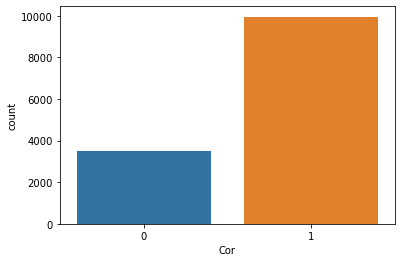

In [199]:
sns.countplot(x=DataFrame['Cor'])

<AxesSubplot:xlabel='ger', ylabel='SalarioInical'>

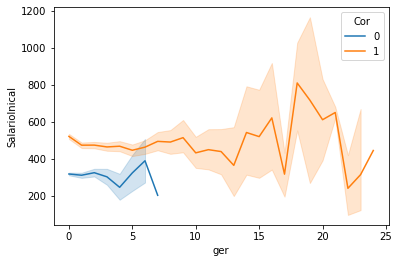

In [200]:
sns.lineplot(data=DataFrame,x='ger',y='SalarioInical',hue='Cor')

<AxesSubplot:xlabel='ger', ylabel='Escolaridade'>

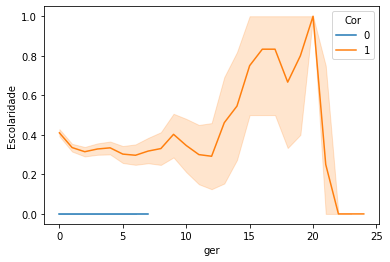

In [201]:
sns.lineplot(data=DataFrame,x='ger',y='Escolaridade',hue='Cor')

<AxesSubplot:xlabel='ger', ylabel='CargoDetrabalho'>

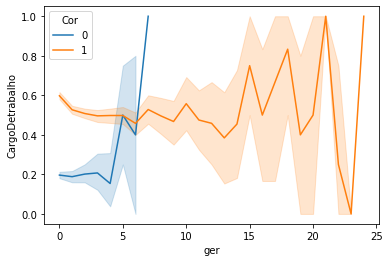

In [202]:
sns.lineplot(data=DataFrame,x='ger',y='CargoDetrabalho',hue='Cor')